In [19]:
import warnings
warnings.filterwarnings(action='ignore')
import requests
# from bs4 import BeautifulSoup # html 문서를 파싱할 때 사용하므로 AJAX 방식으로 넘어오는 데이터를 크롤링 할 때 사용하지 않는다.
import json # json 형태의 문자열을 파이썬에서 처리하기 위해 loads() 메소드로 딕셔너리나 리스트 형태로 변환한다.

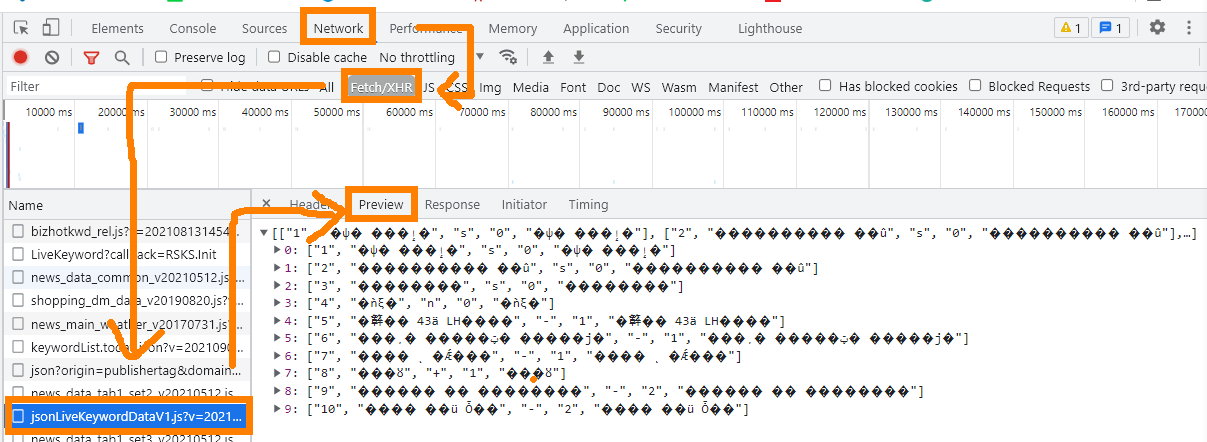

In [20]:
from IPython.display import Image
Image('./nateAjax.png')

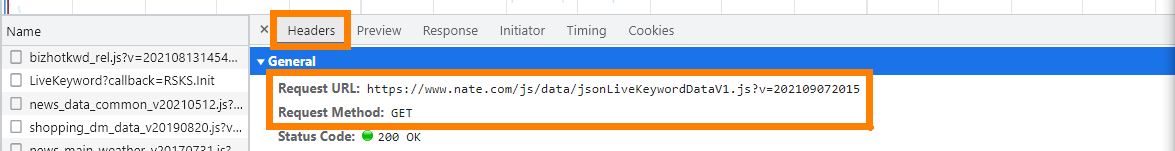

In [21]:
from IPython.display import Image
Image('./nateAjax2.png')

In [22]:
# 실시간 검색어가 웹 페이지에 전부 혹은 일부가 포함되어 있지 않고 ajax를 이용해서 받아오는 방식이 사용된다.
# Request Method가 GET 방식이므로 requests 모듈의 get() 메소드를 사용해서 실시간 검색어를 받아온다.
targetSite = 'https://www.nate.com/js/data/jsonLiveKeywordDataV1.js?v=202109072020'
request = requests.get(targetSite)
print(request)
# 파이썬은 한글 encoding이 유니코드(UTF-8)로 되어있기 때문에 encoding 방식을 'euc-kr'을 사용하는 사이트를 크롤링 할 때
# 한글이 깨져 보이는 현상이 발생될 수 있다.
# 한글 encoding 문제로 한글이 깨져서 보이면 아래와 같이 encoding 방식을 변경하면 된다.
request.encoding = 'euc-kr'

<Response [200]>


In [23]:
issues = request.text
print(type(issues))
print(issues)

<class 'str'>
[["1",  "한국 레바논",  "s",  "0",  "한국 레바논"], ["2",  "델타변이 3천 70명",  "s",  "0",  "신규 확진 코로나"], ["3",  "국민지원금 신청",  "s",  "0",  "국민지원금 신청"], ["4",  "생생정보",  "s",  "0",  "생생정보"], ["5",  "김용호",  "+",  "2",  "김용호"], ["6",  "권민아",  "-",  "1",  "권민아"], ["7",  "고발 사주 제보자",  "-",  "1",  "고발 사주 제보자"], ["8",  "보아 故 권순욱",  "s",  "0",  "보아 故 권순욱"], ["9",  "손흥민",  "n",  "0",  "손흥민"], ["10",  "홍준표 국회의원 200명으로",  "n",  "0",  "홍준표 국회의원 200명으로"]]


In [24]:
# json 문자열 형태로 얻어온 실시간 이슈 키워드는 json 모듈의 loads() 메소드를 사용해서 파이썬에서 처리할 수 있는 데이터
# 타입(리스트나 딕셔너리)로 변환해서 사용한다.
# loads() 메소드는 json 타입의 문자열이 {}를 포함하는 형태면 딕셔너리로 []만 포함하는 형태면 리스트로 자동 변환한다.
ranks = json.loads(issues)
print(type(ranks))
print(ranks)

<class 'list'>
[['1', '한국 레바논', 's', '0', '한국 레바논'], ['2', '델타변이 3천 70명', 's', '0', '신규 확진 코로나'], ['3', '국민지원금 신청', 's', '0', '국민지원금 신청'], ['4', '생생정보', 's', '0', '생생정보'], ['5', '김용호', '+', '2', '김용호'], ['6', '권민아', '-', '1', '권민아'], ['7', '고발 사주 제보자', '-', '1', '고발 사주 제보자'], ['8', '보아 故 권순욱', 's', '0', '보아 故 권순욱'], ['9', '손흥민', 'n', '0', '손흥민'], ['10', '홍준표 국회의원 200명으로', 'n', '0', '홍준표 국회의원 200명으로']]


In [25]:
# requests 모듈의 json() 메소드를 실행하면 json 문자열 형태로 얻어온 실시간 이슈 키워드를 파이썬에서 처리할 수 있는 데이터
# 타입으로 변환할 수 있다.
ranks = request.json()
print(type(ranks))
print(ranks)

<class 'list'>
[['1', '한국 레바논', 's', '0', '한국 레바논'], ['2', '델타변이 3천 70명', 's', '0', '신규 확진 코로나'], ['3', '국민지원금 신청', 's', '0', '국민지원금 신청'], ['4', '생생정보', 's', '0', '생생정보'], ['5', '김용호', '+', '2', '김용호'], ['6', '권민아', '-', '1', '권민아'], ['7', '고발 사주 제보자', '-', '1', '고발 사주 제보자'], ['8', '보아 故 권순욱', 's', '0', '보아 故 권순욱'], ['9', '손흥민', 'n', '0', '손흥민'], ['10', '홍준표 국회의원 200명으로', 'n', '0', '홍준표 국회의원 200명으로']]


In [26]:
for rank in ranks:
    print(rank)

['1', '한국 레바논', 's', '0', '한국 레바논']
['2', '델타변이 3천 70명', 's', '0', '신규 확진 코로나']
['3', '국민지원금 신청', 's', '0', '국민지원금 신청']
['4', '생생정보', 's', '0', '생생정보']
['5', '김용호', '+', '2', '김용호']
['6', '권민아', '-', '1', '권민아']
['7', '고발 사주 제보자', '-', '1', '고발 사주 제보자']
['8', '보아 故 권순욱', 's', '0', '보아 故 권순욱']
['9', '손흥민', 'n', '0', '손흥민']
['10', '홍준표 국회의원 200명으로', 'n', '0', '홍준표 국회의원 200명으로']


In [27]:
for rank in ranks:
    print('{0:>2s}위: {1}'.format(rank[0], rank[1]), end='')
    if rank[2] == '+':
        print('[{}{}]'.format('↑', rank[3]))
    elif rank[2] == '-':
        print('[{}{}]'.format('↓', rank[3]))
    elif rank[2] == 's':
        print('[-]')
    else:
        print('[new]')

 1위: 한국 레바논[-]
 2위: 델타변이 3천 70명[-]
 3위: 국민지원금 신청[-]
 4위: 생생정보[-]
 5위: 김용호[↑2]
 6위: 권민아[↓1]
 7위: 고발 사주 제보자[↓1]
 8위: 보아 故 권순욱[-]
 9위: 손흥민[new]
10위: 홍준표 국회의원 200명으로[new]
